# Lab Assignment 4

## Sam Dauncey, s2028017





## Task 1

The following code defines the `plot_approx` function, which produces a plot of the Fourier series approximation of a given function. We then demostrate it by plotting the $4$-periodic function $f$ (defined below) against the sum of the first 10 terms of it's fourier series.

$$f = \begin{cases} 
          -\frac{x}{2} & -2 \leq x < 0 \\
          2x - \frac{x^2}{2} & 0 \leq x \leq 2 
       \end{cases}
\qquad 
f(x) = f(x + 4)$$

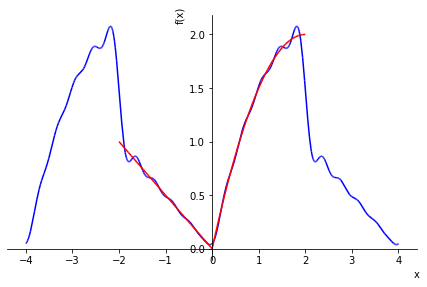

In [1]:
import sympy as sym
import sympy.plotting as sym_plot
sym.init_printing()
from IPython.display import display_latex

x, n = sym.symbols("x n")

def approx_fourier(f, L, num_terms):
    """Returns a sympy expression for the first num_terms terms of the 2L-periodic fourier series of f."""
    # Compute the fourier coefficients
    a0 = sym.integrate(f, (x,-L,L)) / L
    an = sym.integrate(f*sym.cos(n*sym.pi*x/L), (x, -L, L)) / L
    bn = sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, -L, L)) / L
    # Sum up and simplify the terms
    f10 = a0/2 + sym.Sum(an*sym.cos(n*sym.pi*x/L) + bn*sym.sin(n*sym.pi*x/L), 
                         (n, 1, num_terms))
    f10.simplify()
    f10_expr = f10.doit()
    return f10_expr


def plot_approx(f, L, num_terms):
    """Plots f between -L and L against it's fourier series evaluated up to num_terms between -2L and 2L."""
    # Get a sympy expression for the first num_terms of the fourier series
    f_approx = approx_fourier(f, L, num_terms)
    # Plot f against this approximation
    f_plot = sym_plot.plot((f_approx,(x,-2*L,2*L)), 
                           (f,(x,-L,L)), 
                           show  = False)
    f_plot[0].line_color = "blue"
    f_plot[1].line_color = "red"
    f_plot.show()

f = sym.Piecewise((-x/2,            x < 0),
                  (2*x - (x**2)/2,  x >= 0))

plot_approx(f, 2, 10)

## Task 2

Here we solve the wave equation with initial condition defined by :

$$u(x, 0) = 
f(x) = 
\begin{cases} 
      1 & \frac{L}{2} - 1 \leq x \leq \frac{L}{2} + 1 \\
      0 & \text{otherwise}
   \end{cases}
\qquad 
f(x) = f(x + 2L)$$

In our solution we set $L = 10$ and animate the solution for $20$ seconds.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML




L = 10 # Length of string
a = 1 # wave speed
fps = 2 # number of frames per second
sim_time = 20 # amount of time simulation is run for



# Definig symbols and f
x, n, t = sym.symbols("x n t")

f = sym.Piecewise((1, (L//2 - 1 < x) & (x < L//2 + 1)),
                  (0, True))


# Compute a symbolic expression for u's fourier series up to 200 terms.

cn = sym.Rational(2,L) * sym.integrate(f*sym.sin(n*sym.pi*x/L), (x, 0, L))

u_symbolic = sym.Sum(cn.simplify()*sym.sin(n*sym.pi*x/L)*sym.cos(n*sym.pi*a*t/L), (n,1,200))


# Numerically evaluate this expression at many points

x_vals = np.linspace(0, L, 200)

u = sym.lambdify([x, t], u_symbolic, modules='numpy')

u_0 = u(x_vals, 0)

# set up and plot the initial frame
fig, ax = plt.subplots(figsize=(12, 8))

line, = ax.plot(x_vals, u_0, 'k-')
ax.plot(x_vals, u_0, 'r:')
plt.xlabel('x')
plt.ylabel('u')
plt.ylim(-1.2, 1.2)
plt.close()

# add an annotation showing the time (this will be updated in each frame)
txt = ax.text(0, 0.9, 't=0')

def init():
    line.set_ydata(u(x_vals,0))
    return line,

# Animate our solution changing over time
def animate(i):
    line.set_ydata(u(x_vals,i/fps))  # update the data
    txt.set_text('t='+str(i/fps)) # update the annotation
    return line, txt

ani = animation.FuncAnimation(fig, animate, np.arange(0, fps*sim_time + 1), init_func=init,
                              interval=sim_time, blit=True, repeat=True)

HTML(ani.to_jshtml())

In [3]:
ani.save('hdeq_lab4_task2.mp4', writer='ffmpeg', fps=20)

We can see that the solution is periodic with respect to time with period $2L$, hence why it was sufficient to animate the solution for 20 seconds (as after this the solution just repeats). We can see that the initial square wave of the solution splits into two smaller square waves, which reflect off of the fixed endpoints twice before returning to their starting position.